# Insurance Claim Fraud Detection

# Step 1 : Understanding the Data

In [1]:
import pandas as pd

# Loading the dataset 
df = pd.read_csv("Automobile_insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [2]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [4]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [5]:
# Dropping unnecessary columns (e.g., "_c39" may not provide useful information)
df = df.drop(columns=['_c39'])

In [6]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

#  Step 2: Exploratory Data Analysis (EDA)

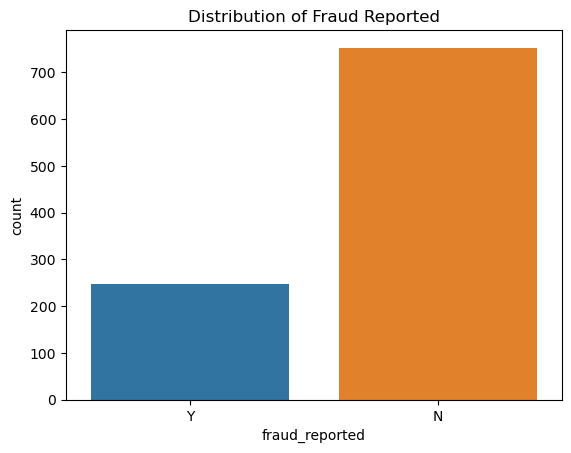

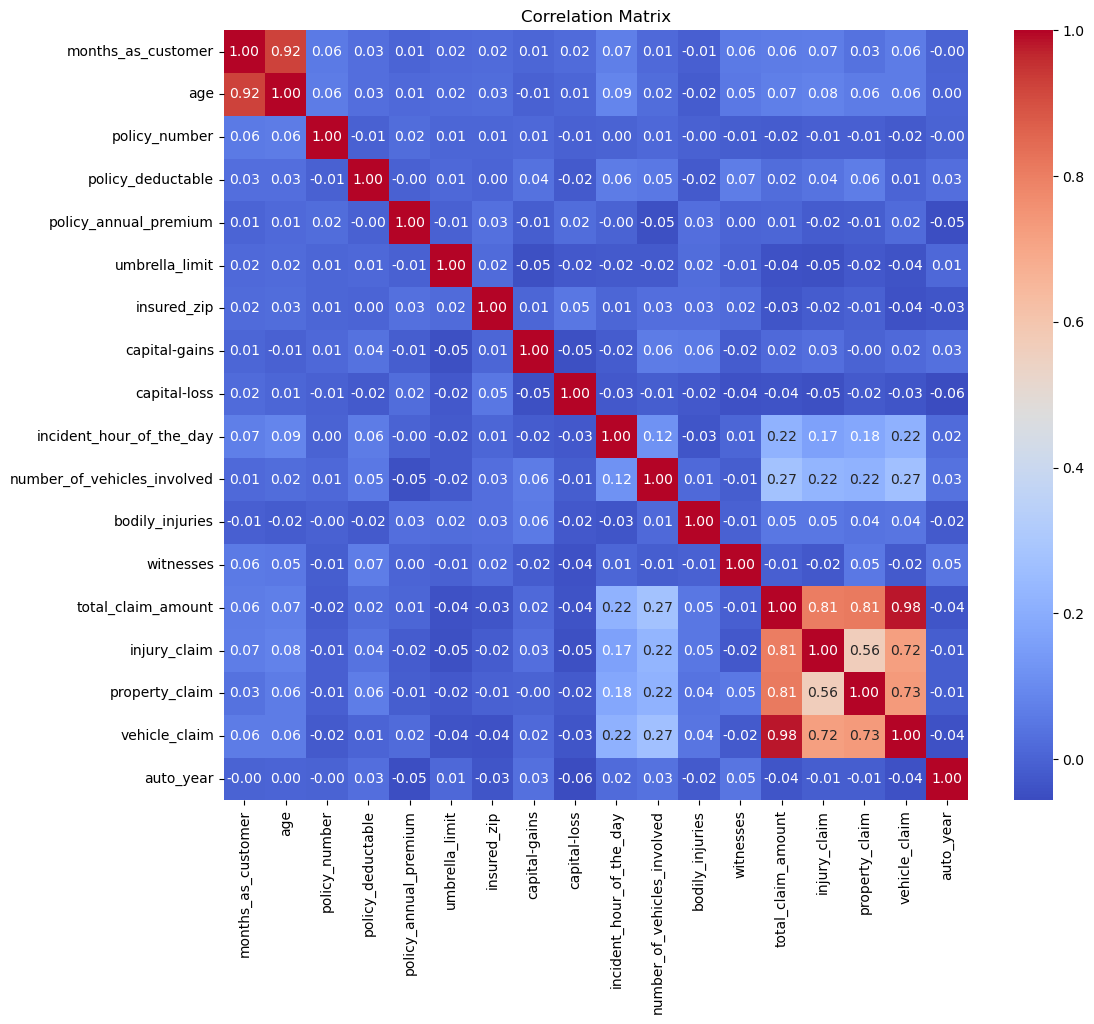

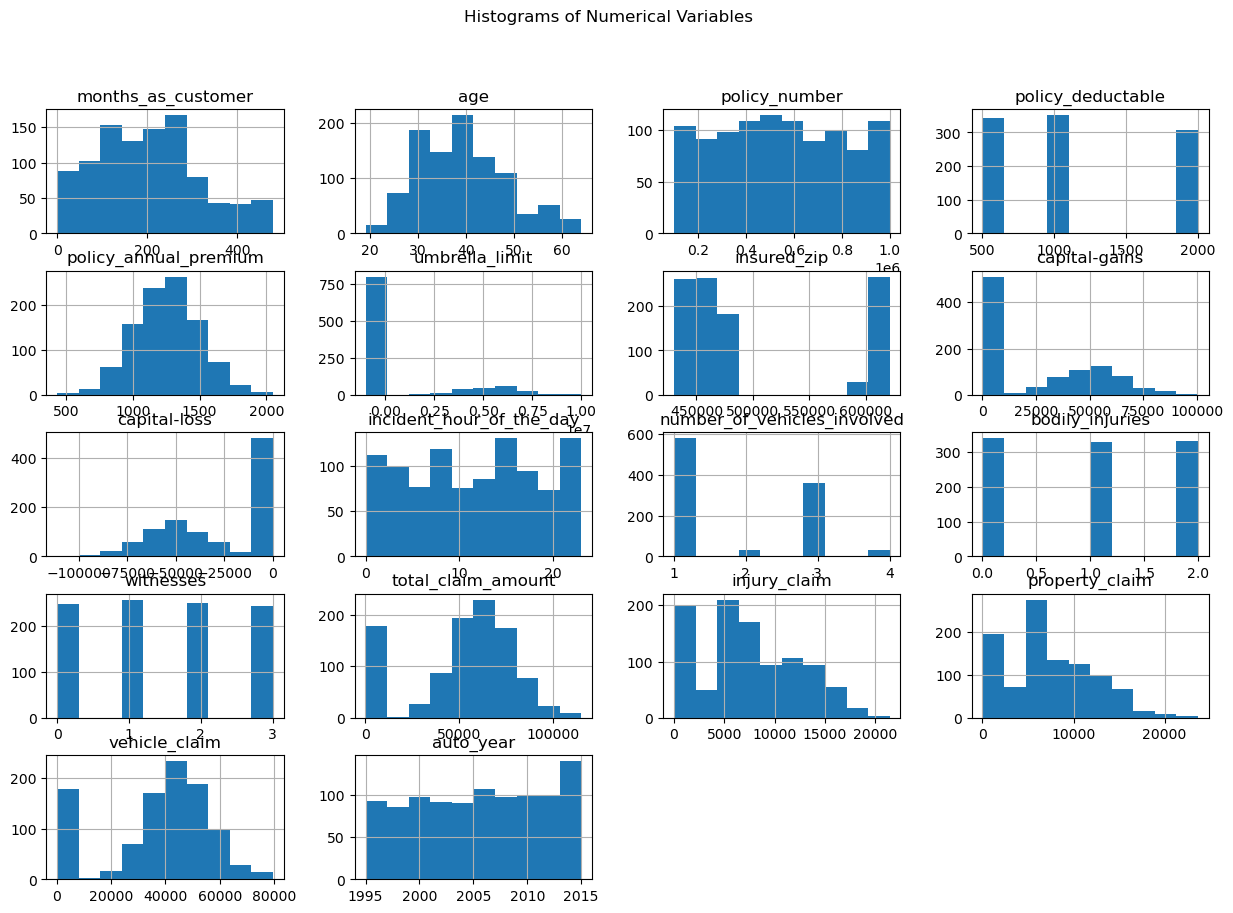

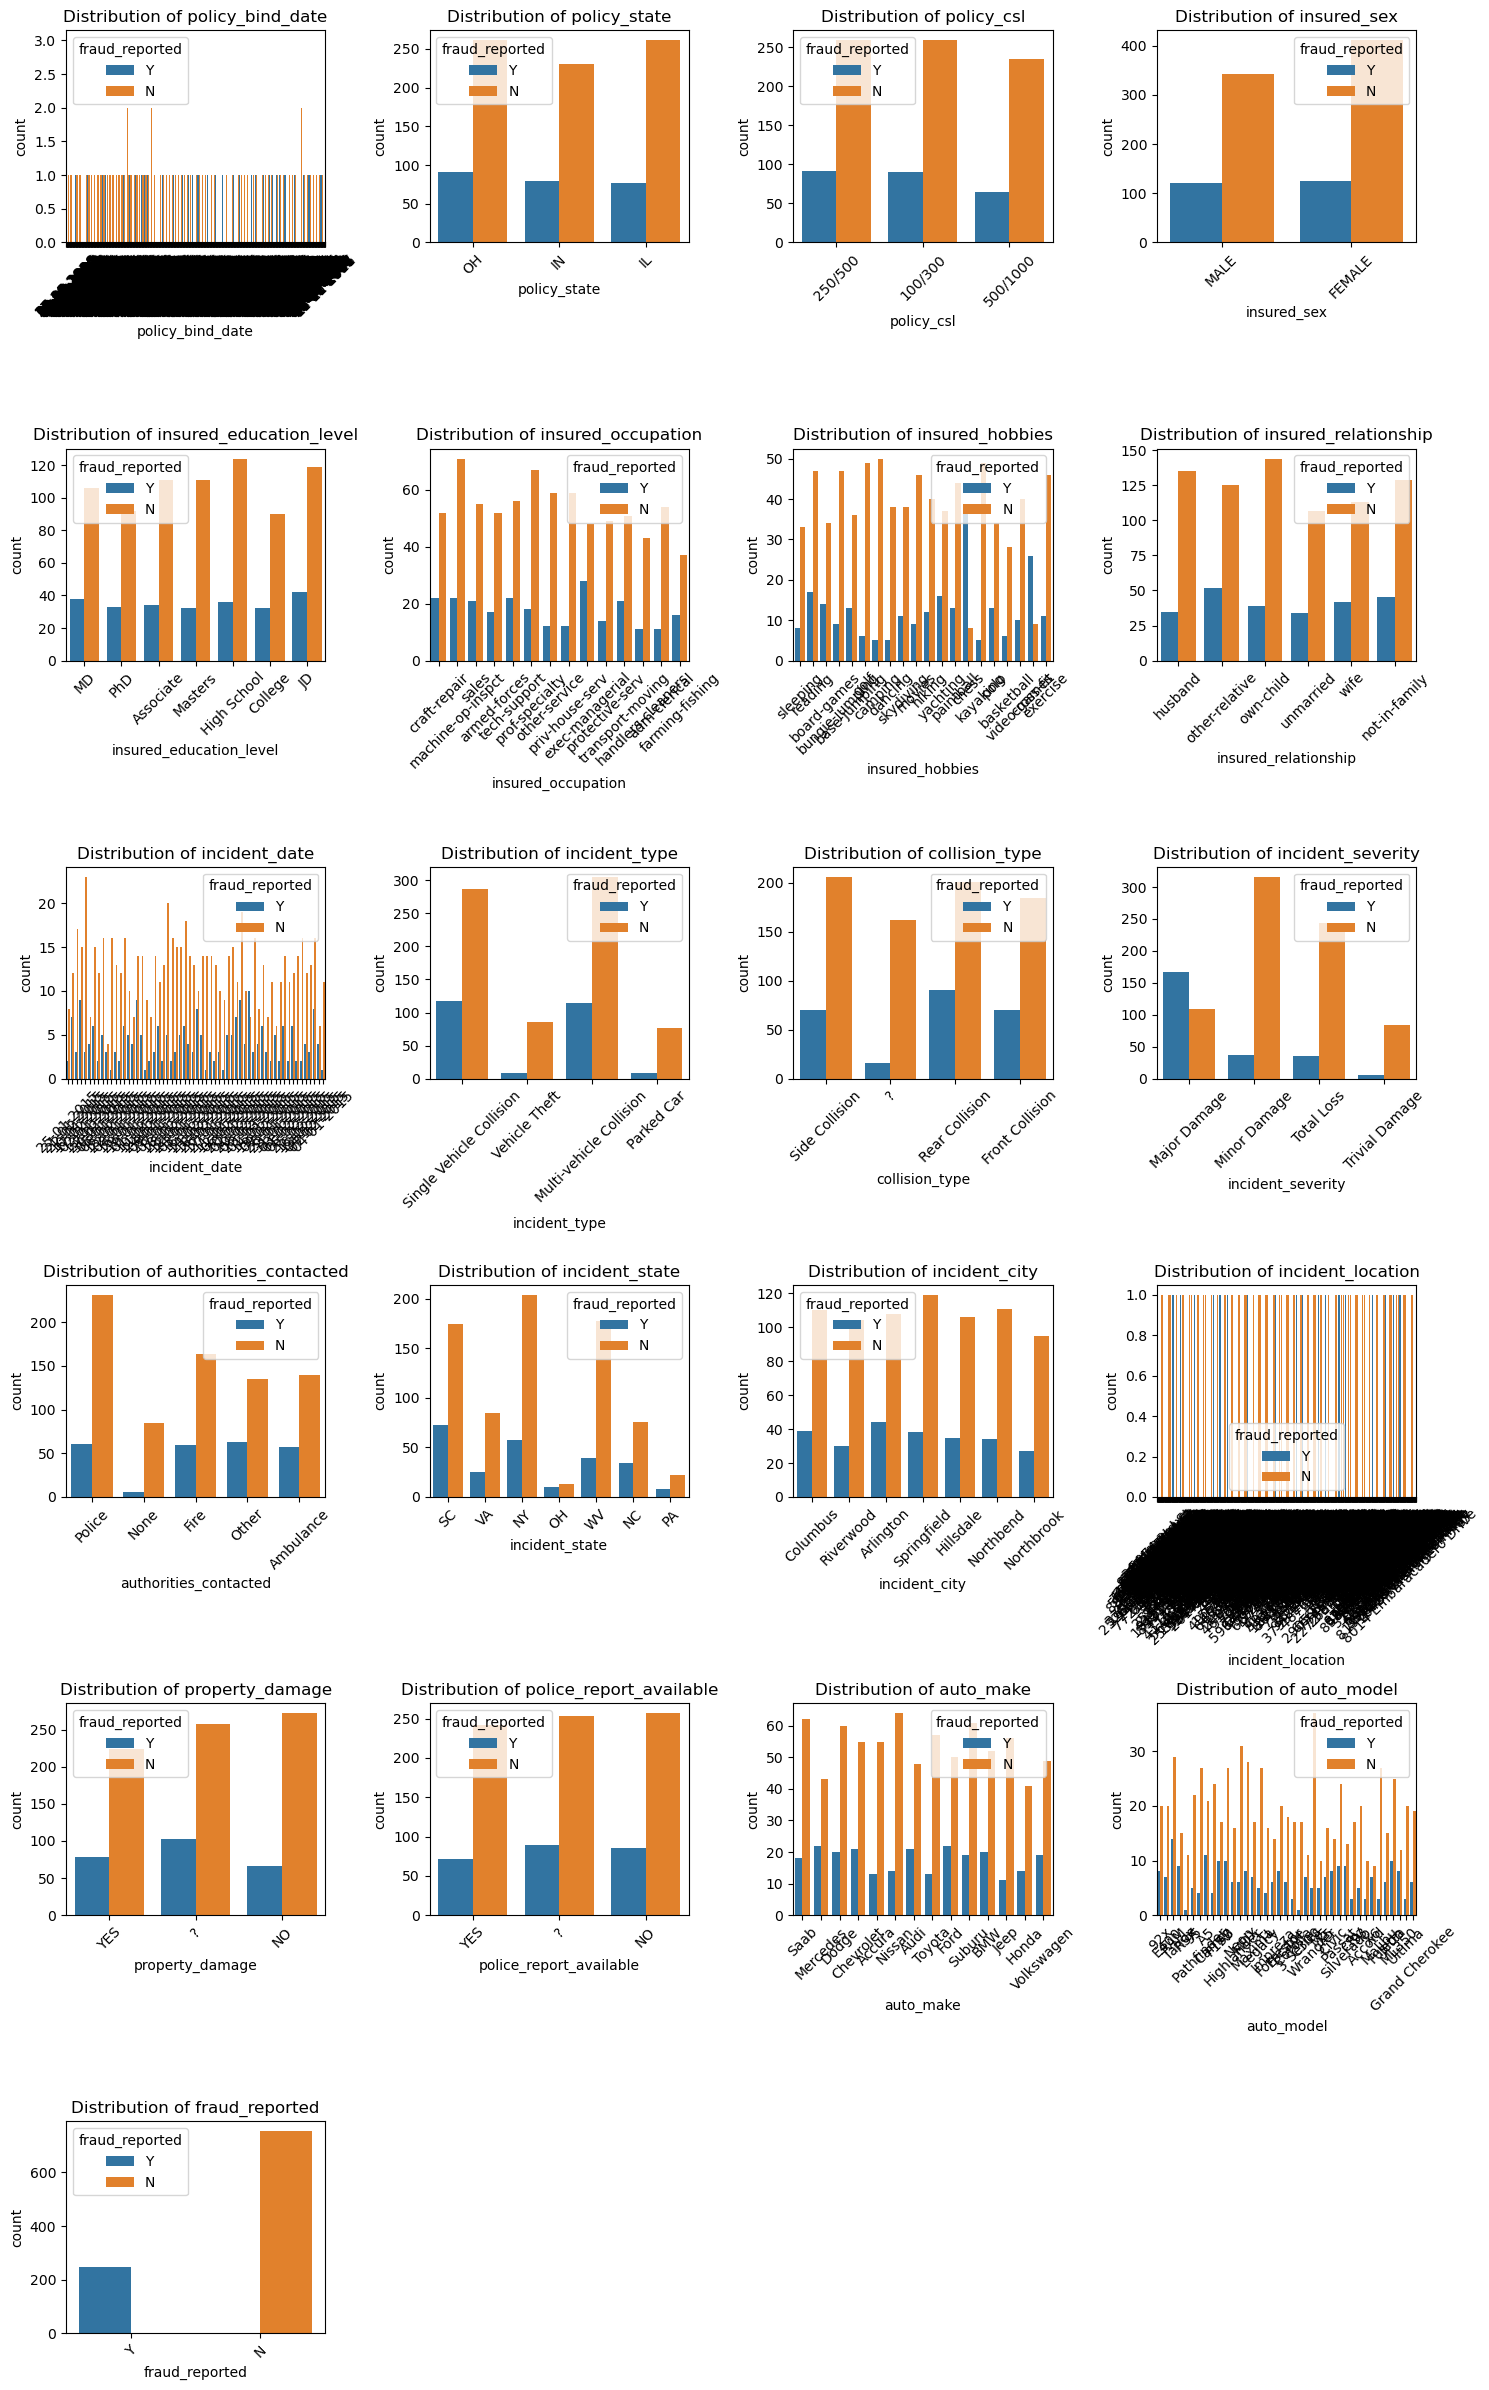

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of the target variable (fraud_reported)
sns.countplot(x='fraud_reported', data=df)
plt.title('Distribution of Fraud Reported')
plt.show()

# Visualizing the correlation matrix to identify relationships between variables
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Visualizing the distribution of numerical variables
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols].hist(figsize=(15, 10))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

# Visualizing the distribution of categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
num_categorical_cols = len(categorical_cols)
rows = (num_categorical_cols // 4) + 1  # Calculate the number of rows needed

plt.figure(figsize=(15, 4 * rows))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, 4, i)
    sns.countplot(x=col, data=df, hue='fraud_reported')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Step 3: Data Preprocessing

In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Copying the original DataFrame to avoid modifying the original data
df_processed = df.copy()

# Converting date columns to datetime format
df_processed['policy_bind_date'] = pd.to_datetime(df_processed['policy_bind_date'])
df_processed['incident_date'] = pd.to_datetime(df_processed['incident_date'])

# Labeling encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = df_processed.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_processed[col] = label_encoder.fit_transform(df_processed[col])

# Dropping unnecessary columns
df_processed = df_processed.drop(columns=['policy_number', 'incident_location'])

# Displaying the processed DataFrame
print("Processed DataFrame:")
print(df_processed.head())
df.info()


Processed DataFrame:
   months_as_customer  age policy_bind_date  policy_state  policy_csl  \
0                 328   48       2014-10-17             2           1   
1                 228   42       2006-06-27             1           1   
2                 134   29       2000-06-09             2           0   
3                 256   41       1990-05-25             0           1   
4                 228   44       2014-06-06             0           2   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0               1000                1406.91               0       466132   
1               2000                1197.22         5000000       468176   
2               2000                1413.14         5000000       430632   
3               2000                1415.74         6000000       608117   
4               1000                1583.91         6000000       610706   

   insured_sex  ...  witnesses  police_report_available  total_claim_amount  \
0   

C:\Users\ACHINTYA\AppData\Local\Temp\ipykernel_8740\2557588052.py:8: UserWarning: Parsing '17-10-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_processed['policy_bind_date'] = pd.to_datetime(df_processed['policy_bind_date'])
C:\Users\ACHINTYA\AppData\Local\Temp\ipykernel_8740\2557588052.py:8: UserWarning: Parsing '27-06-2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_processed['policy_bind_date'] = pd.to_datetime(df_processed['policy_bind_date'])
C:\Users\ACHINTYA\AppData\Local\Temp\ipykernel_8740\2557588052.py:8: UserWarning: Parsing '25-05-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_processed['policy_bind_date'] = pd.to_datetime(df_processed['policy_bind_date'])
C:\Users\ACHINTYA\AppData\Local\Temp\ipykernel_8740\2557588052.py:8: UserWarning: Parsing '25-07-2011' in DD/MM/YYYY format. Provide for

# Step 4: Feature Engineering

In [12]:
# Feature Engineering
# Creating a new feature 'days_between_incident_and_policy_bind'
df_processed['days_between_incident_and_policy_bind'] = (df_processed['incident_date'] - df_processed['policy_bind_date']).dt.days

# Creating a new feature 'is_weekend_incident'
df_processed['is_weekend_incident'] = (df_processed['incident_date'].dt.dayofweek >= 5).astype(int)

# Dropping the original date columns
df_processed = df_processed.drop(columns=['policy_bind_date', 'incident_date'])

# Displaying the updated DataFrame with new features
print("DataFrame with New Features:")
print(df_processed.head())


DataFrame with New Features:
   months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                 328   48             2           1               1000   
1                 228   42             1           1               2000   
2                 134   29             2           0               2000   
3                 256   41             0           1               2000   
4                 228   44             0           2               1000   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                1406.91               0       466132            1   
1                1197.22         5000000       468176            1   
2                1413.14         5000000       430632            0   
3                1415.74         6000000       608117            0   
4                1583.91         6000000       610706            1   

   insured_education_level  ...  total_claim_amount  injury_claim  \
0                        4  ..

# Step 5: Split the Data

In [13]:
from sklearn.model_selection import train_test_split

# Separating the features (X) and the target variable (y)
X = df_processed.drop(columns=['fraud_reported'])
y = df_processed['fraud_reported']

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (800, 36) (800,)
Testing set shape: (200, 36) (200,)


# Step 6: Building a Machine Learning Model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initializing models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Training and evaluating each model
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluating the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Displaying the evaluation metrics
    print(f"\n{model_name} Accuracy: {accuracy:.2%}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"\nClassification Report:\n{classification_rep}")
    print("\n" + "="*50 + "\n")


Training and evaluating Logistic Regression...

Logistic Regression Accuracy: 72.50%
Confusion Matrix:
[[145   0]
 [ 55   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       145
           1       0.00      0.00      0.00        55

    accuracy                           0.73       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.53      0.72      0.61       200



Training and evaluating Decision Tree...

Decision Tree Accuracy: 74.50%
Confusion Matrix:
[[120  25]
 [ 26  29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       145
           1       0.54      0.53      0.53        55

    accuracy                           0.74       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.74      0.74      0.74       200



Training and evaluating Random Forest...


C:\Users\ACHINTYA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ACHINTYA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACHINTYA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to


Random Forest Accuracy: 73.50%
Confusion Matrix:
[[132  13]
 [ 40  15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       145
           1       0.54      0.27      0.36        55

    accuracy                           0.73       200
   macro avg       0.65      0.59      0.60       200
weighted avg       0.70      0.73      0.70       200



Training and evaluating SVM...

SVM Accuracy: 72.50%
Confusion Matrix:
[[145   0]
 [ 55   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       145
           1       0.00      0.00      0.00        55

    accuracy                           0.73       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.53      0.72      0.61       200





C:\Users\ACHINTYA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACHINTYA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACHINTYA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Observation:**

The Decision Tree model demonstrates reasonable performance in identifying fraudulent insurance claims.

# Step 7: Model Tuning

In [16]:
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameters to tune
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initializing the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Creating GridSearchCV object
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')

# Fitting the model with hyperparameter tuning on the training set
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_

# Printing the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Evaluating the model with the best hyperparameters on the testing set
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Displaying the evaluation metrics for the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
classification_rep_tuned = classification_report(y_test, y_pred_tuned)

# Displaying the evaluation metrics for the tuned model
print("\nTuned Decision Tree Accuracy: {:.2%}".format(accuracy_tuned))
print("Confusion Matrix:\n", conf_matrix_tuned)
print("\nClassification Report:\n", classification_rep_tuned)


Best Hyperparameters:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}

Tuned Decision Tree Accuracy: 75.50%
Confusion Matrix:
 [[125  20]
 [ 29  26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.84       145
           1       0.57      0.47      0.51        55

    accuracy                           0.76       200
   macro avg       0.69      0.67      0.68       200
weighted avg       0.74      0.76      0.75       200



# Step 8: Interpret the Model

Feature Importance:
                                  Feature  Importance
17                      incident_severity    0.420805
11                        insured_hobbies    0.313754
7                             insured_zip    0.046315
33                              auto_year    0.038129
22            number_of_vehicles_involved    0.031397
13                          capital-gains    0.025807
5                   policy_annual_premium    0.024151
12                   insured_relationship    0.022920
18                  authorities_contacted    0.020058
34  days_between_incident_and_policy_bind    0.016054
28                           injury_claim    0.015429
9                 insured_education_level    0.012411
32                             auto_model    0.009308
21               incident_hour_of_the_day    0.003462
29                         property_claim    0.000000
30                          vehicle_claim    0.000000
31                              auto_make    0.000000
27      

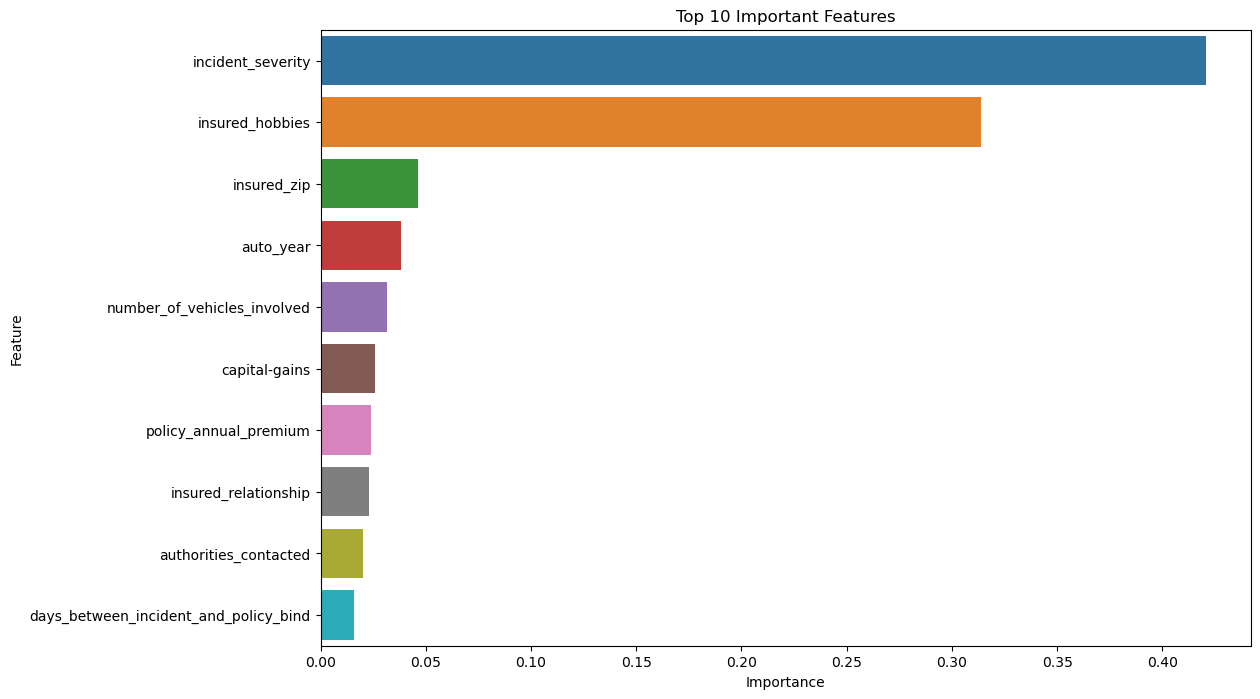

In [17]:
# Extracting feature importance from the tuned Decision Tree model
feature_importance = best_model.feature_importances_

# Creating a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sorting the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Displaying the feature importance
print("Feature Importance:")
print(feature_importance_df)

# Visualizing the top N important features
top_n = 10  
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n), orient='h')
plt.title(f'Top {top_n} Important Features')
plt.show()


# Step 9: Deploy the Model

In [18]:
import joblib

# Saving the tuned Decision Tree model to a file
model_filename = 'tuned_decision_tree_model.joblib'
joblib.dump(best_model, model_filename)

print(f"Model saved to {model_filename}")


Model saved to tuned_decision_tree_model.joblib


In [34]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib

# Loading the trained Decision Tree model
model_filename = 'tuned_decision_tree_model.joblib'
loaded_model = joblib.load(model_filename)

# Example of new data
new_data_dict = {
    'months_as_customer': [24],
    'age': [35],
    'policy_bind_date': ['2023-01-15'],
    'policy_state': ['OH'],
    'policy_csl': ['250/500'],
    'policy_deductable': [1000],
    'policy_annual_premium': [1200.50],
    'umbrella_limit': [5000000],
    'insured_zip': [43123],
    'insured_sex': ['F'],
    'insured_education_level': ['JD'],
    'insured_occupation': ['exec-managerial'],
    'insured_hobbies': ['reading'],
    'insured_relationship': ['married'],
    'capital-gains': [0],
    'capital-loss': [0],
    'incident_date': ['2023-02-10'],
    'incident_type': ['Single Vehicle Collision'],
    'collision_type': ['Rear Collision'],
    'incident_severity': ['Minor Damage'],
    'authorities_contacted': ['Police'],
    'incident_state': ['OH'],
    'incident_city': ['Springfield'],
    'incident_location': ['123 Main St'],
    'incident_hour_of_the_day': [15],
    'number_of_vehicles_involved': [1],
    'property_damage': ['NO'],
    'bodily_injuries': [1],
    'witnesses': [2],
    'police_report_available': ['YES'],
    'total_claim_amount': [5000],
    'injury_claim': [1000],
    'property_claim': [3000],
    'vehicle_claim': [1000],
    'auto_make': ['Honda'],
    'auto_model': ['Civic'],
    'auto_year': [2022],
}

new_data = pd.DataFrame(new_data_dict)

# Preprocessing the new data
def preprocess_data(df):
    # Converting date columns to datetime format if they exist
    date_columns = ['incident_date', 'policy_bind_date']
    for col in date_columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col])

    # Extracting year, month, and day from date columns if they exist
    for col in date_columns:
        if col in df.columns:
            df[col + '_year'] = df[col].dt.year
            df = df.drop(columns=[col], errors='ignore')

    # Converting categorical variables to numerical using Label Encoding
    label_encoder = LabelEncoder()
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col] = label_encoder.fit_transform(df[col])

    # Dropping unnecessary columns
    df = df.drop(columns=['incident_location'])

    return df

# Preprocessing the new data
new_data_processed = preprocess_data(new_data)

# Making predictions using the loaded model
predictions = loaded_model.predict(new_data_processed)

# Displaying the predictions
print("Predictions for New Data:")
print(predictions)


Predictions for New Data:
[1]


C:\Users\ACHINTYA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- incident_date_year
- policy_bind_date_year
Feature names seen at fit time, yet now missing:
- days_between_incident_and_policy_bind
- is_weekend_incident

  warnings.warn(message, FutureWarning)


**The prediction result for the new data is 1, which typically indicates a positive prediction for fraud.**

**Observation:**

The predictive model applied to the new insurance claim data suggests a potential case of fraud.